# Housing Price Prediction using Python
### by Michelan Wilson

In [ ]:
#### import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [98]:
#### Create working directory
import os
print(os.getcwd())
os.chdir("C:/Users/michy/Housing_Price_Prediction/housing_data")

C:\Users\michy\Housing_Price_Prediction\housing_data


In [99]:
####Load data into python
housing_data = pd.read_excel("Housing_data.xlsx")
####Print first few rows of data
housing_data.head(6)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700


In [100]:
####Extract output variable and rename dataframe "Y"

Y = housing_data['median_house_value']

In [101]:
Y

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20640, dtype: int64

In [102]:
####Extract input variables and rename dataframe "X"
X = housing_data.loc[:, 'longitude':'ocean_proximity']

In [103]:
X


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND


In [104]:
####Find columns with missing values in input dataframe
X.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [105]:
####Find mean of total bedrooms column
X.total_bedrooms.mean()

537.8705525375618

In [106]:
####Replace missing values in X dataframe with mean
X['total_bedrooms'] = X['total_bedrooms'].fillna(X['total_bedrooms'].mean())

In [107]:
X.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [108]:
####Find missing values in Y dataframe
Y.isnull().sum()

0

In [109]:
###Find unique values for categorical data column
X.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [110]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

In [115]:
###Use dummies to encode categorical variable
X = pd.get_dummies(X, columns=['ocean_proximity'], drop_first=True)

In [116]:
###Split dataset into test and training datasets with 20% test and 80% training
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [117]:
###Standardize training and test datasets using sklearn
from sklearn.preprocessing import StandardScaler
####Initalise standard scaler
scaler = StandardScaler()
####Fit the scaler using X_train data
scaler.fit(X_train)
####Transform X_train and X_test using the scaler and convert back to DataFrame
X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [118]:
X_train


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.720265,-0.676363,1.542312,-0.043703,-0.266525,-0.441868,-0.351468,0.450737,1.464017,-0.015566,-0.35207,-0.386705
1,-1.129840,1.916352,1.144321,0.155534,0.144863,-0.217852,0.157418,-0.846941,1.464017,-0.015566,-0.35207,-0.386705
2,-0.785750,1.477225,-0.686438,-0.242027,-0.396561,-0.606979,-0.481285,0.156749,1.464017,-0.015566,-0.35207,-0.386705
3,1.243880,-0.316653,-0.049652,-0.391112,-0.545512,-0.628398,-0.624085,-0.124499,1.464017,-0.015566,-0.35207,-0.386705
4,0.037073,-0.601618,0.825928,-1.060856,-1.181508,-1.219228,-1.242018,4.163769,-0.683052,-0.015566,-0.35207,2.585953
...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.660423,-0.657677,0.427937,-0.097501,-0.148310,-0.172335,-0.117795,0.428783,-0.683052,-0.015566,-0.35207,-0.386705
16508,0.735225,-0.835196,0.587133,-0.765421,-0.895428,-0.900609,-0.888913,0.406513,-0.683052,-0.015566,-0.35207,-0.386705
16509,-1.089945,0.776492,-1.800813,0.406289,0.050291,-0.042031,-0.021730,1.198030,-0.683052,-0.015566,-0.35207,-0.386705
16510,-1.184694,0.799849,0.587133,-0.821955,-0.772484,-0.785477,-0.748710,-0.310348,-0.683052,-0.015566,-0.35207,-0.386705


In [119]:
###Linear Regressions
####Import Library
from sklearn.linear_model import LinearRegression

In [121]:
####Initialise & Fit Model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [122]:
###Predict output for test dataset using the fitted model.
Y_predicted = model.predict(X_test)

In [125]:
###Regression Results - intercept and coefficients
print(model.intercept_)
coefficients = pd.DataFrame(model.coef_, X_train.columns, columns=['Coef'])
coefficients

206605.10895106554


,Coef
longitude,-53832.019953
latitude,-55144.206003
housing_median_age,13375.841699
total_rooms,-8008.168495
total_bedrooms,30659.086456
population,-50543.036221
households,32789.588389
median_income,73061.679934
ocean_proximity_INLAND,-18341.261361
ocean_proximity_ISLAND,2646.295627


In [126]:
###Print Root Mean Squared Error
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('MSE:',mean_squared_error(Y_test,Y_predicted))

MSE: 5247534236.428382


In [146]:
##Bonus Question
###Linear regression with one independent variable
####Extract median income from X_test and X_train
X_train_alt = X_train.loc[:,['median_income']]
X_test_alt = X_test.loc[:,['median_income']]
X_train_alt

,median_income
0,0.450737
1,-0.846941
2,0.156749
3,-0.124499
4,4.163769
...,...
16507,0.428783
16508,0.406513
16509,1.198030
16510,-0.310348


In [147]:
####Initialise & Fit Model Alternative Model
model_Alt = LinearRegression()
model.fit(X_train_alt, Y_train)

LinearRegression()

In [148]:
###Predict output for test dataset using the Alt fitted model.
Y_predicted_Alt = model.predict(X_test_alt)

In [149]:
###Regression Results - intercept and coefficients
print(model.intercept_)
coefficients1 = pd.DataFrame(model.coef_, X_train_alt.columns, columns=['Coef'])
coefficients1

206605.1089510659


,Coef
median_income,79348.769003


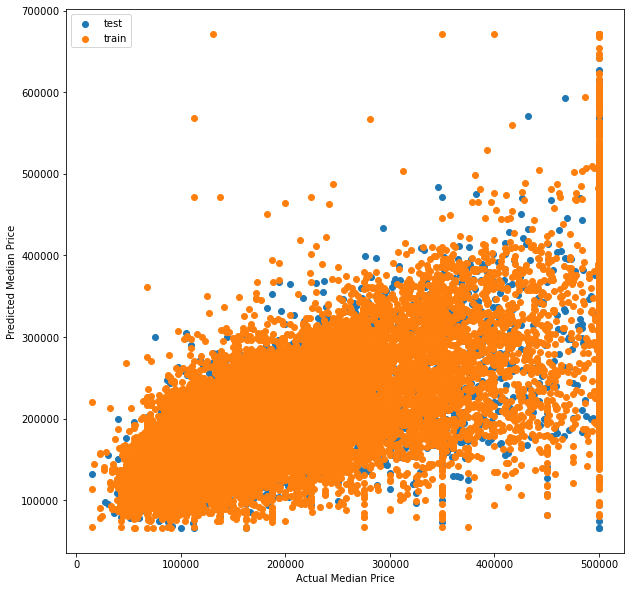

In [169]:
### Visualizing the regression line
plt.subplots(figsize=(10,10))
plt.scatter(Y_test, Y_predicted_Alt, label ='test')
plt.scatter(Y_train,  model.predict(X_train_alt), label = 'train')
plt.xlabel('Actual Median Price')
plt.ylabel('Predicted Median Price')
plt.legend()